## Problem statement: Given the dataset, build an application for predicting the house price for the house with following parameters as input:

CRIM = 0.0654
ZN = 12
INDUS = 6.51
CHAS = 0.12
NOX = 0.42
RM = 4.76
AGE = 3.21
DIS = 8.12
RAD= 3.0
TAX = 342
PTRATIO= 12.7
B= 296
LSTAT = 4.32

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/content/housing.csv')

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [6]:
## check missing values in dataset

dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [7]:
dataset['PRICE'].mean()

np.float64(23.750442477876106)

In [8]:
## remove null values

dataset['PRICE'] = dataset['PRICE'].fillna(dataset['PRICE'].mean())

In [9]:
## check missing values in dataset

dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## EDA

In [10]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.288969,0.586719,-0.067536,-0.139448,-0.185045,0.462470,-0.312843,-0.151996,0.754362,-0.140015,-0.053260,0.392225,-0.281410
ZN,-0.288969,1.000000,-0.491587,-0.005843,0.038450,0.078721,-0.488006,0.268317,0.062767,-0.256799,0.049491,0.015810,-0.390092,0.330706
INDUS,0.586719,-0.491587,1.000000,-0.185873,-0.394483,-0.448809,0.700699,-0.605973,-0.427834,0.748951,-0.351166,0.233471,0.465583,-0.369043
CHAS,-0.067536,-0.005843,-0.185873,1.000000,0.585243,0.585447,-0.269616,0.523772,0.587673,-0.347552,0.470870,-0.495956,0.011260,0.124836
NOX,-0.139448,0.038450,-0.394483,0.585243,1.000000,0.975767,-0.550065,0.923503,0.985957,-0.570346,0.775302,-0.856608,0.079688,-0.021732
RM,-0.185045,0.078721,-0.448809,0.585447,0.975767,1.000000,-0.595786,0.946946,0.992620,-0.610962,0.806522,-0.848289,0.029450,0.017135
AGE,0.462470,-0.488006,0.700699,-0.269616,-0.550065,-0.595786,1.000000,-0.744068,-0.585574,0.635697,-0.477048,0.417216,0.414354,-0.240797
DIS,-0.312843,0.268317,-0.605973,0.523772,0.923503,0.946946,-0.744068,1.000000,0.947606,-0.689224,0.766224,-0.778075,-0.080368,0.042339
RAD,-0.151996,0.062767,-0.427834,0.587673,0.985957,0.992620,-0.585574,0.947606,1.000000,-0.586540,0.805556,-0.861694,0.056185,-0.007632
TAX,0.754362,-0.256799,0.748951,-0.347552,-0.570346,-0.610962,0.635697,-0.689224,-0.586540,1.000000,-0.485166,0.372806,0.284030,-0.273793


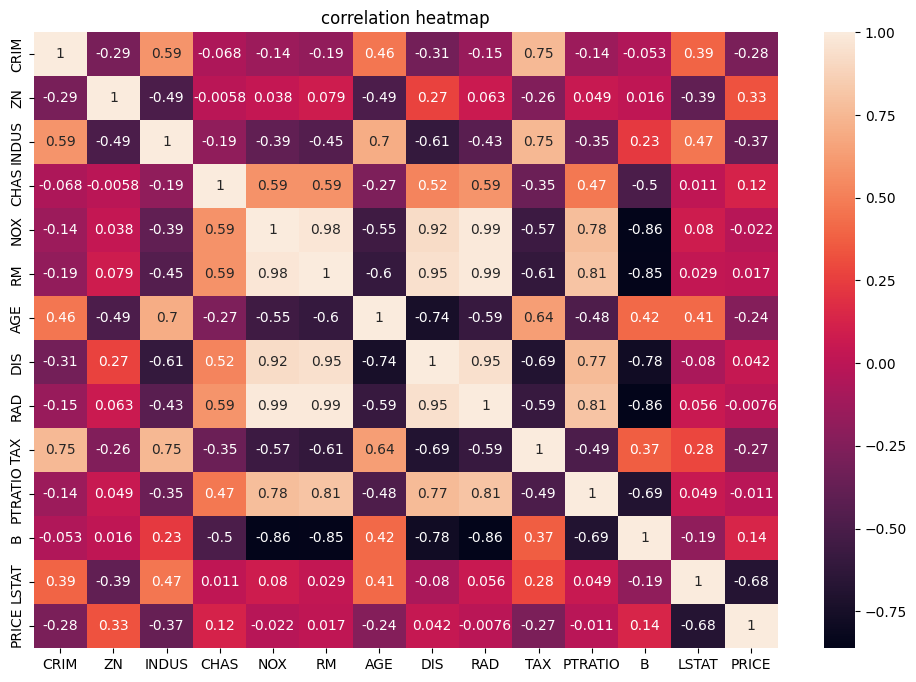

In [11]:
plt.figure(figsize = (12, 8))
sns.heatmap(dataset.corr(), annot = True)
plt.title("correlation heatmap")
plt.show()

## Model building

In [12]:
X = dataset.drop('PRICE', axis = 1)
y = dataset['PRICE']

In [13]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [14]:
y

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X.shape

(506, 13)

In [18]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [19]:
y_train.shape, y_test.shape

((404,), (102,))

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
## print the coefficients and the intercept
print(regression.coef_)

[ 4.61394308e-01  1.01329958e-01 -2.37272231e-01  3.27352532e+00
  2.88252735e-02  6.32802773e-02 -3.43458646e-03 -1.80311976e+00
  3.99396315e-02 -1.08079027e-02  5.80479435e-04  1.07650702e-02
 -8.10428129e-01]


In [23]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [24]:
reg_pred

array([22.93547702, 33.38094468, 33.06852401, 26.04475461, 27.21878107,
       24.99139415, 28.38377658, 21.29861162, 24.85272139, 16.18384078,
       29.60478442, 12.42216568, 28.2662141 , 23.3541076 , 20.26011922,
       18.73848294, 18.77181963, 26.5577979 , 26.60549509, 25.00805732,
       23.54905204, 19.41261491, 24.4686167 , 22.39338776, 12.05368892,
       19.92981216, 30.1898443 , 35.77445874,  4.85875943, 31.95087883,
       23.89708878, 16.49273241, 29.60947035, 31.84791716, 18.98789363,
       24.59378056, 35.02973531, 32.86406258, 20.15040306, 24.4505045 ,
       17.30945522, 16.68382045, 12.72311612, 14.79658873, 31.26768965,
       28.15356281, 35.52832935, 22.03552769, 18.30094094, 26.26088726,
       17.1841169 , 25.4336897 , 26.73275176, 16.48940117, 25.85751922,
       10.87207775, 17.35411086, 16.44465148, 25.1020121 , 35.76294024,
        8.59551701, 19.48458371, 27.68188173, 23.33541523, 19.4262275 ,
       31.1877783 , 29.6807276 , 32.2972487 , 31.59908958, 26.47

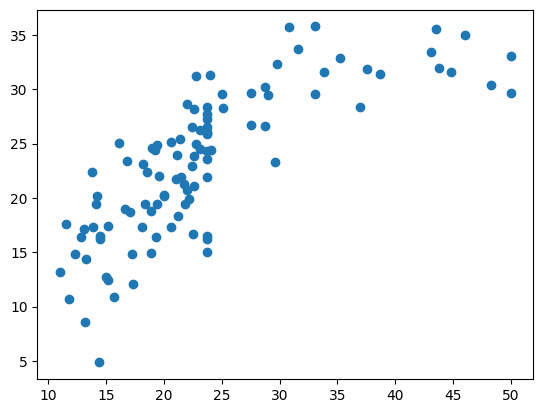

In [25]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))


4.219326765613814
31.7976502798201
5.638940528132931


In [28]:
import pickle

In [29]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [30]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))